In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)

Warning message:
"package 'dplyr' was built under R version 3.4.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded


# Data Pre-Processing

In [2]:
df_alldata = read.csv("dataset2017.csv")

In [3]:
df_alldata = subset(df_alldata, select=-c(X))
rownames(df_alldata) = seq(length=nrow(df_alldata))

        Using our domain knowledge, the following attributes are excluded from this analysis:

In [4]:
exclude =  c('fips',
'parcelid',
'propertycountylandusecode',
'rawcensustractandblock',
'censustractandblock',
'taxvaluedollarcnt',
'structuretaxvaluedollarcnt',
'landtaxvaluedollarcnt',
'taxamount',
'assessmentyear',
'taxdelinquencyflag',
'taxdelinquencyyear',
'transactiondate'
)

In [5]:
df_data=df_alldata[,-which(names(df_alldata) %in% exclude)]

        Upon further review and testing, we notice that city, neighborhood, and zip code do not reconcile, and thus the corresponding attributes have to be discarded.

In [6]:
low_quality_attributes = c('regionidcounty', 'regionidcity', 'regionidneighborhood', 'regionidzip')

In [7]:
df_data = df_data[,-which(names(df_data) %in% low_quality_attributes)]

In [8]:
names(df_data)

[1] "airconditioningtypeid"        "architecturalstyletypeid"    
 [3] "basementsqft"                 "bathroomcnt"                 
 [5] "bedroomcnt"                   "buildingclasstypeid"         
 [7] "buildingqualitytypeid"        "calculatedbathnbr"           
 [9] "decktypeid"                   "finishedfloor1squarefeet"    
[11] "calculatedfinishedsquarefeet" "finishedsquarefeet12"        
[13] "finishedsquarefeet13"         "finishedsquarefeet15"        
[15] "finishedsquarefeet50"         "finishedsquarefeet6"         
[17] "fireplacecnt"                 "fullbathcnt"                 
[19] "garagecarcnt"                 "garagetotalsqft"             
[21] "hashottuborspa"               "heatingorsystemtypeid"       
[23] "latitude"                     "longitude"                   
[25] "lotsizesquarefeet"            "poolcnt"                     
[27] "poolsizesum"                  "pooltypeid10"                
[29] "pooltypeid2"                  "pooltypeid7"                 
[31] "propertylandusetypeid"        "propertyzoningdesc"          
[33] "roomcnt"                      "storytypeid"                 
[35] "threequarterbathnbr"          "typeconstructiontypeid"      
[37] "unitcnt"                      "yardbuildingsqft17"          
[39] "yardbuildingsqft26"           "yearbuilt"                   
[41] "numberofstories"              "fireplaceflag"               
[43] "logerror"

        This analysis only considers general residential properties.  Therefore, property types ('PropertyLandUseTypeID') of commerical, office, timeshare, vacant land etc. are excluded from the original dataset.  The code below keeps data that are general residential properties only.

In [9]:
c_PropertyType = c('246', '261', '264', '265', '266', '268', '269', '273', '276', '279')
df_data=filter(df_data, propertylandusetypeid %in% c_PropertyType)

Warning message:
"package 'bindrcpp' was built under R version 3.4.3"

        Checking missing values

In [10]:
library(scales)
apply(df_data, 2, function(col) percent(sum(is.na(col))/length(col)))

Warning message:
"package 'scales' was built under R version 3.4.4"

airconditioningtypeid     architecturalstyletypeid 
                     "67.2%"                      "99.7%" 
                basementsqft                  bathroomcnt 
                     "99.9%"                         "0%" 
                  bedroomcnt          buildingclasstypeid 
                        "0%"                       "100%" 
       buildingqualitytypeid            calculatedbathnbr 
                       "36%"                     "0.494%" 
                  decktypeid     finishedfloor1squarefeet 
                     "99.2%"                      "92.1%" 
calculatedfinishedsquarefeet         finishedsquarefeet12 
                    "0.195%"                      "3.02%" 
        finishedsquarefeet13         finishedsquarefeet15 
                      "100%"                      "97.5%" 
        finishedsquarefeet50          finishedsquarefeet6 
                     "92.1%"                      "99.7%" 
                fireplacecnt                  fullbathcnt 
                     "89.1%"                     "0.494%" 
                garagecarcnt              garagetotalsqft 
                     "66.6%"                      "66.6%" 
              hashottuborspa        heatingorsystemtypeid 
                       "98%"                      "35.2%" 
                    latitude                    longitude 
                        "0%"                         "0%" 
           lotsizesquarefeet                      poolcnt 
                     "10.8%"                      "78.8%" 
                 poolsizesum                 pooltypeid10 
                     "98.9%"                      "99.4%" 
                 pooltypeid2                  pooltypeid7 
                     "98.6%"                      "80.2%" 
       propertylandusetypeid           propertyzoningdesc 
                        "0%"                         "0%" 
                     roomcnt                  storytypeid 
                        "0%"                      "99.9%" 
         threequarterbathnbr       typeconstructiontypeid 
                     "86.7%"                      "99.7%" 
                     unitcnt           yardbuildingsqft17 
                     "35.2%"                      "96.9%" 
          yardbuildingsqft26                    yearbuilt 
                     "99.9%"                     "0.264%" 
             numberofstories                fireplaceflag 
                       "77%"                      "99.8%" 
                    logerror 
                        "0%"

        Drop empty attributes (those that are 100% NAs)

In [11]:
df_data = subset(df_data, select=-c(buildingclasstypeid, finishedsquarefeet13))

        Fill in missing values with 0's.

In [12]:
df_data[is.na(df_data)]<- 0

        ‘logerror’ is transformed into three categories in order for this analysis to conduct classifications.  The transformed categories are stored as ‘logerror_interval’.  The three categories are:
        "Underestimate >3%",
        "Accurate Estimate" (within +/- 3%),
        "Overestimate >3%".

In [13]:
df_data$logerror_interval = 0

In [14]:
df_data$logerror_interval<- cut(df_data$logerror, breaks=c(-Inf, -0.013228266, 0.012837225, Inf), 
                                labels=c("Underestimate >3%",
                                        "Accurate Estimate",
                                         "Overestimate >3%"))

# Exploratory Data Analysis
Identify following categorical attributes:

In [15]:
categorical = c('airconditioningtypeid',
'architecturalstyletypeid',
'decktypeid',
'fireplaceflag',
'hashottuborspa',
'heatingorsystemtypeid',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7',
'propertylandusetypeid',
'propertyzoningdesc',
'storytypeid',
'typeconstructiontypeid')

In [16]:
df_data[categorical] <- lapply(df_data[categorical], as.factor)

For all categorical attributes, examine distributions of types and average logerror within each type:

In [17]:
df_data %>% group_by(airconditioningtypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

airconditioningtypeid,Record.Count,Average_logerror
0,51160,0.01739203
1,23122,0.01501672
5,167,0.01640635
9,17,0.03440443
11,53,0.02024216
13,1573,0.02040255


In [18]:
df_data %>% group_by(architecturalstyletypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

architecturalstyletypeid,Record.Count,Average_logerror
0,75885,0.016718977
2,5,0.045882424
3,3,0.009410889
7,173,0.016458231
8,19,0.084041889
21,7,0.008935539


In [19]:
df_data %>% group_by(decktypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

decktypeid,Record.Count,Average_logerror
0,75481,0.01674080
66,611,0.01615687


In [20]:
df_data %>% group_by(fireplaceflag) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

fireplaceflag,Record.Count,Average_logerror
0,75920,0.01673902
1,172,0.01544807


In [21]:
df_data %>% group_by(hashottuborspa) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

hashottuborspa,Record.Count,Average_logerror
0,74554,0.01661807
1,1538,0.02245785


In [22]:
df_data %>% group_by(heatingorsystemtypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

heatingorsystemtypeid,Record.Count,Average_logerror
0,26763,0.021193951
1,13,0.056071203
2,33585,0.014361952
6,777,0.013101175
7,13913,0.014924904
10,3,-0.030611935
11,1,-0.060694240
13,60,0.005401495
18,23,0.025562325
20,104,0.004534829


In [23]:
df_data %>% group_by(pooltypeid10) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

pooltypeid10,Record.Count,Average_logerror
0,75628,0.01663836
1,464,0.03266808


In [24]:
df_data %>% group_by(pooltypeid2) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

pooltypeid2,Record.Count,Average_logerror
0,75018,0.01671734
1,1074,0.01804673


In [25]:
df_data %>% group_by(pooltypeid7) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

pooltypeid7,Record.Count,Average_logerror
0,61030,0.01757801
1,15062,0.01332477


In [26]:
df_data %>% group_by(propertylandusetypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

propertylandusetypeid,Record.Count,Average_logerror
246,2021,0.019336213
261,52441,0.018298494
264,6,-0.015428282
265,335,0.021781493
266,19342,0.012914551
269,1947,0.009150743


In [27]:
df_data %>% group_by(propertyzoningdesc) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

propertyzoningdesc,Record.Count,Average_logerror
,26872,0.020161541
1NR1*,5,-0.003430031
1NR3*,3,-0.046632582
AH RM-CD-F,1,0.025196840
AH RM-CD*,5,0.010094812
AH RS-(3)-,1,0.033674674
AHA11*,2,0.152717514
AHPPD1O*,1,0.065344888
AHPRD10*,1,0.029857459
AHR110000*,7,-0.002737075


In [28]:
df_data %>% group_by(storytypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

storytypeid,Record.Count,Average_logerror
0,76042,0.016752405
7,50,-0.008052147


In [29]:
df_data %>% group_by(typeconstructiontypeid) %>% summarise(Record.Count = n(), Average_logerror = mean(logerror))

typeconstructiontypeid,Record.Count,Average_logerror
0,75869,0.01671325
4,1,0.03436810
6,220,0.02448351
10,1,0.01341669
13,1,0.03200071


    We noticed that some categorical attributes are have too many types, or almost all observations are of only one type.  It would be not very meaningful to include these attributes as features for our models, and therefore such attributes are excluded.  The attributes are as follows: ‘propertyzoningdesc’, ‘storytypeid’


In [30]:
df_data = subset(df_data, select=-c(propertyzoningdesc, storytypeid))

        Geospatial attributes  (‘latitude’ & ‘longitude’, ‘regionidcounty’, ‘regionidcity’, ‘regionidneighborhood’)
        'logerror' heatmap of each county:

In [31]:
#latitude and longitude
df_data$latitude <- df_data$latitude/(1e6)
df_data$longitude <- df_data$longitude/(1e6)

In [34]:
options(repr.plot.width=5, repr.plot.height=5)
library(ggmap)

LA_Map <- qmap("Los Angeles County", zoom = 10, maptype = "roadmap", color = "bw", legend = "bottomleft")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Los+Angeles+County&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Los%20Angeles%20County&sensor=false
Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

In [35]:
OC_Map <- qmap("Irvine, CA", zoom = 10, maptype = "roadmap", color = "bw", legend = "bottomleft")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Irvine,+CA&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Irvine,%20CA&sensor=false
Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

In [36]:
VC_Map <- qmap("Camarillo, CA", zoom = 10, maptype = "roadmap", color = "bw", legend = "bottomleft")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Camarillo,+CA&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Camarillo,%20CA&sensor=false
Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

Warning message:
"Removed 25369 rows containing missing values (geom_point)."

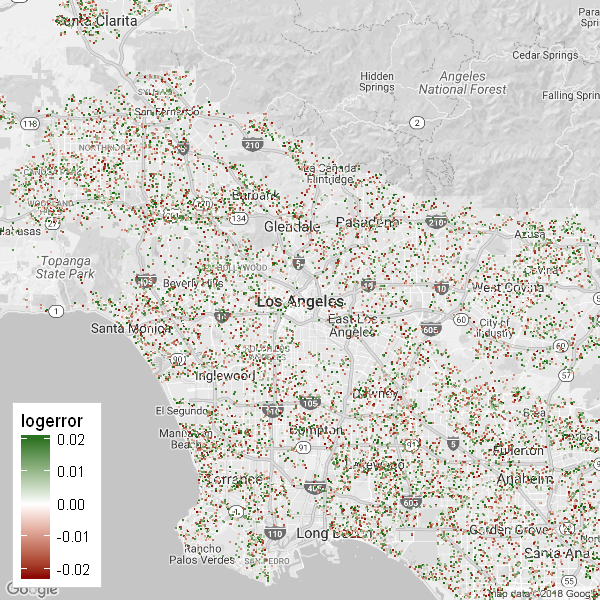

In [37]:
LA_Map +
  geom_point(aes(x = longitude, y = latitude, colour = logerror),
             data = df_data, 
             size = 0.001) +
  scale_colour_gradient2(low = "darkred", high = "darkgreen", mid = "#FFFFFF00", 
                         na.value = "#FFFFFF00", limit = c(-.0223, .0212)) #+/- 5%

Warning message:
"Removed 44455 rows containing missing values (geom_point)."

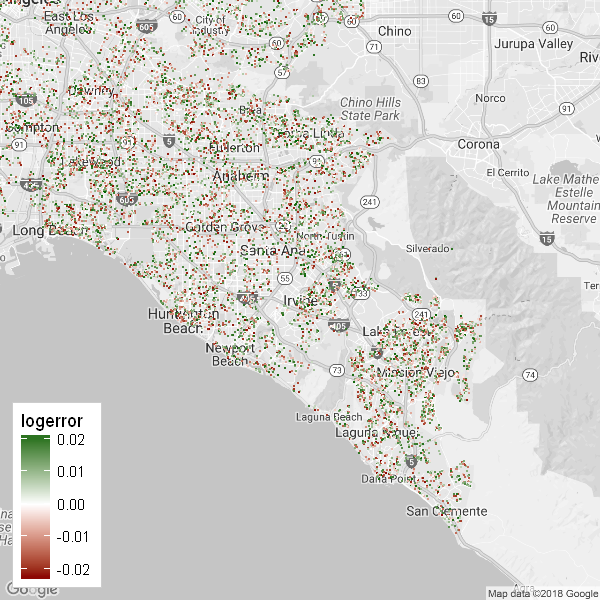

In [38]:
OC_Map +
  geom_point(aes(x = longitude, y = latitude, colour = logerror),
             data = df_data, 
             size = 0.001) +
  scale_colour_gradient2(low = "darkred", high = "darkgreen", mid = "#FFFFFF00", 
                         na.value = "#FFFFFF00", limit = c(-.0223, .0212)) #+/- 5%

Warning message:
"Removed 67645 rows containing missing values (geom_point)."

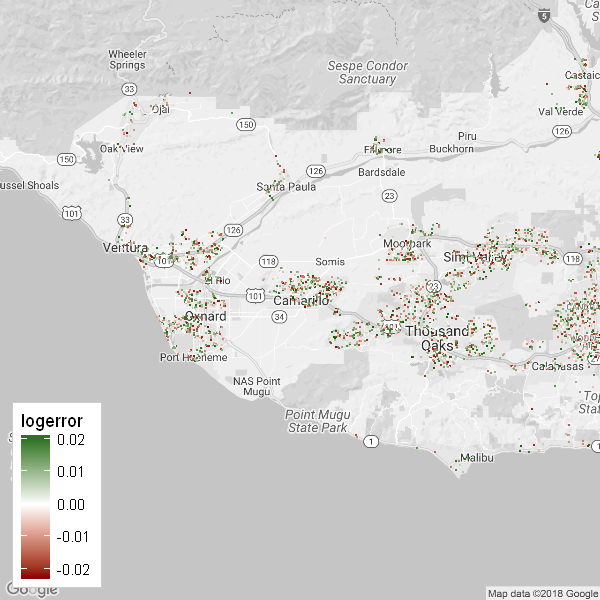

In [39]:
VC_Map +
  geom_point(aes(x = longitude, y = latitude, colour = logerror),
             data = df_data, 
             size = 0.001) +
  scale_colour_gradient2(low = "darkred", high = "darkgreen", mid = "#FFFFFF00", 
                         na.value = "#FFFFFF00", limit = c(-.0223, .0212)) #+/- 5%

In [40]:
#drop 'latitude' and 'longitude' so that they will not interfere with building classifiers
df_data = subset(df_data, select=-c(latitude, longitude))

In [41]:
summary(df_data$logerror)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.65542 -0.02395  0.00668  0.01674  0.03889  5.26300 

Saving 6.67 x 6.67 in image


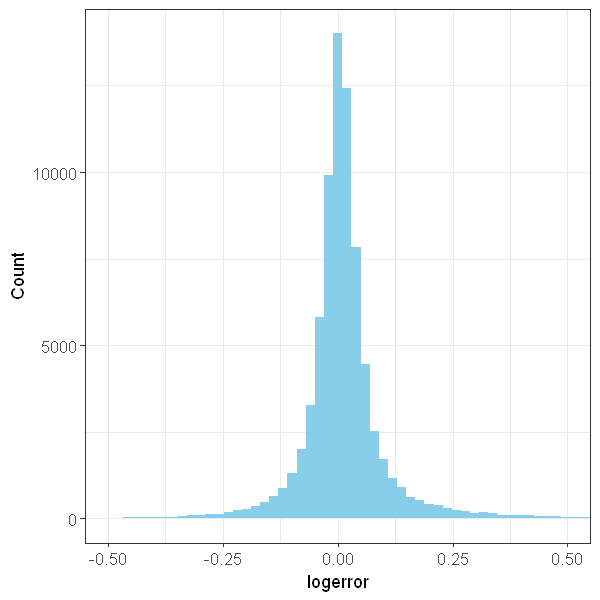

In [42]:
#logerror visualization
ggplot(df_data,aes(x=logerror)) + 
   geom_histogram(bins=500, fill = "skyblue")+
  theme_bw()+ theme(axis.text = element_text(size=10))+
  ylab("Count")+coord_cartesian(x=c(-0.5,0.5))
ggsave("logerror.png")

In [43]:
summary(df_data$logerror_interval)

Underestimate >3% Accurate Estimate  Overestimate >3% 
            24540             18118             33434

In [44]:
ncol(df_data)

[1] 38

In [45]:
write.csv(df_data, 'data_after_EDA.csv', row.names=F)